<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.352104,98.222342,61.094295,1.041947e-06,249.668742,249.668748,-0.000006
1,0.0,1.0,90.653907,54.188980,69.716881,-1.600762e-05,224.559752,224.559770,-0.000018
2,0.0,2.0,98.139324,40.370437,50.559631,-4.797891e-07,199.069391,199.069394,-0.000003
3,0.0,3.0,41.248354,34.659402,68.907567,1.901827e-05,154.815341,154.815309,0.000032
4,0.0,4.0,96.705913,62.812680,26.625052,-1.253434e-05,196.143633,196.143653,-0.000020
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,82.175404,28.841944,58.401299,-5.223243e-05,179.418595,179.418640,-0.000045
19996,999.0,16.0,93.213096,69.111485,25.389046,-4.930846e-06,197.713623,197.713641,-0.000018
19997,999.0,17.0,50.772045,35.116638,70.252223,8.054495e-07,166.140907,166.140890,0.000017
19998,999.0,18.0,42.589381,34.436340,44.659662,-4.532129e-05,131.685337,131.685371,-0.000034


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.352104,98.222342,61.094295,1.041947e-06,249.668742,249.668748,-0.000006
1,0.0,1.0,90.653907,54.188980,69.716881,-1.600762e-05,224.559752,224.559770,-0.000018
2,0.0,2.0,98.139324,40.370437,50.559631,-4.797891e-07,199.069391,199.069394,-0.000003
3,0.0,3.0,41.248354,34.659402,68.907567,1.901827e-05,154.815341,154.815309,0.000032
4,0.0,4.0,96.705913,62.812680,26.625052,-1.253434e-05,196.143633,196.143653,-0.000020
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,82.175404,28.841944,58.401299,-5.223243e-05,179.418595,179.418640,-0.000045
19996,999.0,16.0,93.213096,69.111485,25.389046,-4.930846e-06,197.713623,197.713641,-0.000018
19997,999.0,17.0,50.772045,35.116638,70.252223,8.054495e-07,166.140907,166.140890,0.000017
19998,999.0,18.0,42.589381,34.436340,44.659662,-4.532129e-05,131.685337,131.685371,-0.000034


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

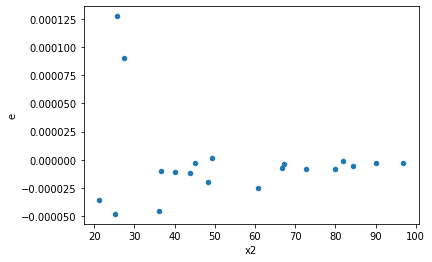

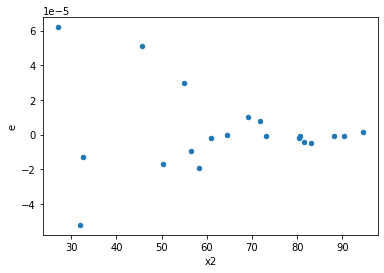

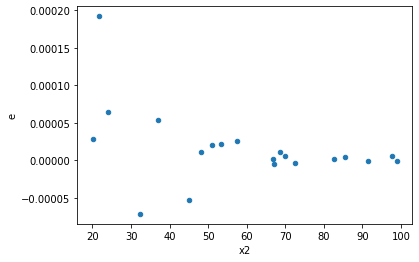

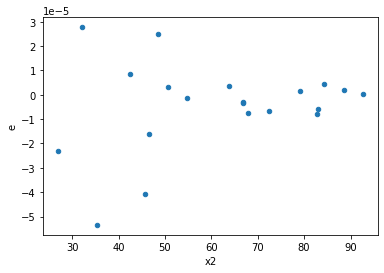

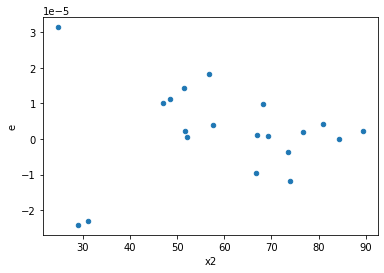

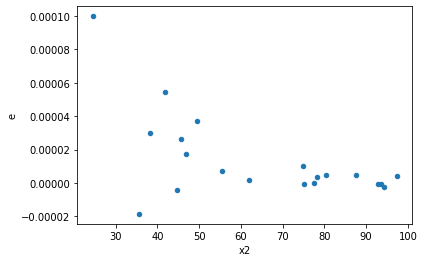

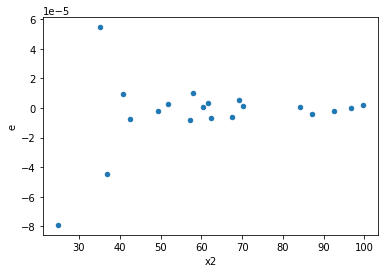

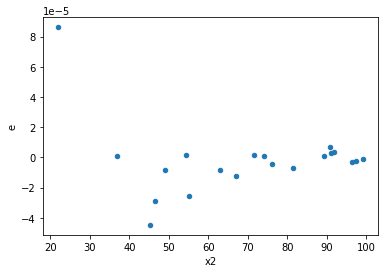

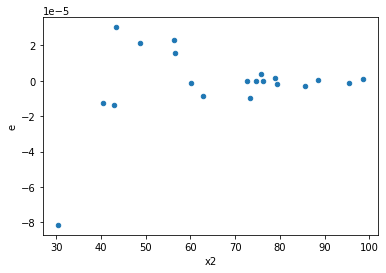

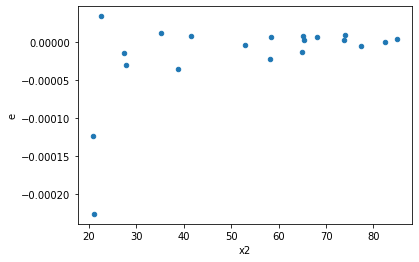

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,6.0,8.0,4.43665942003765e-10,9.942386307939721e-09,8.8733188400753e-11,1.420340901134246e-09,16.807216928297624,0.002828439633985713,0.9985857801830071,Reject005=0 : Heteroscedasticity
3.0,2.0,12.0,2.7573362712881956e-11,2.569729650935409e-08,2.7573362712881956e-11,2.3361178644867356e-09,155.3268201690214,0.012827858017258498,0.9935860709913708,Reject005=0 : Heteroscedasticity
7.0,9.0,5.0,2.357257591419102e-10,2.7134167441524784e-09,2.9465719892738773e-11,6.783541860381196e-10,20.719628424376545,0.00021579327943910265,0.9998921033602804,Reject005=0 : Heteroscedasticity
8.0,8.0,6.0,9.931056412510204e-10,2.2734064273989698e-09,1.418722344644315e-10,4.54681285479794e-10,3.05225188938295,0.14742433335022476,0.9262878333248876,Reject005=1 : Homoscedasticity
9.0,9.0,5.0,2.6195203666555267e-09,4.29778177413031e-08,3.2744004583194083e-10,1.0744454435325775e-08,29.532151350712752,5.0267833323180966e-05,0.9999748660833384,Reject005=0 : Heteroscedasticity
10.0,6.0,8.0,9.990773531075478e-10,2.230287841354539e-08,1.9981547062150957e-10,3.1861254876493413e-09,16.7426063238553,0.002858852916691079,0.9985705735416545,Reject005=0 : Heteroscedasticity
11.0,7.0,7.0,2.0507087715879018e-09,5.401476726281486e-09,3.417847952646503e-10,9.002461210469143e-10,2.6339560258958774,0.2246379489367012,0.8876810255316494,Reject005=1 : Homoscedasticity
14.0,4.0,10.0,3.5068446860335016e-13,1.5172954992356536e-09,1.168948228677834e-13,1.685883888039615e-10,1730.6674632937065,1.6008315293358777e-06,0.9999991995842353,Reject005=0 : Heteroscedasticity
15.0,5.0,9.0,9.539219005458763e-10,6.470095022270167e-09,2.3848047513646907e-10,8.087618777837709e-10,3.7681252862918933,0.1580289696757795,0.9209855151621102,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,6.131296593968114e-09,1.4034595618624204e-09,1.0218827656613522e-09,2.339099269770701e-10,0.22890094131853367,0.0704524950325686,Reject005=1 : Homoscedasticity
1.0,6.0,8.0,4.43665942003765e-10,9.942386307939721e-09,8.8733188400753e-11,1.420340901134246e-09,16.807216928297624,0.002828439633985713,Reject005=0 : Heteroscedasticity
2.0,10.0,4.0,8.665252522163852e-08,3.2483404001294404e-10,9.628058357959835e-09,1.0827801333764801e-10,0.00937174188467354,0.00041428890351325647,Reject005=0 : Heteroscedasticity
3.0,2.0,12.0,2.7573362712881956e-11,2.569729650935409e-08,2.7573362712881956e-11,2.3361178644867356e-09,155.3268201690214,0.012827858017258498,Reject005=0 : Heteroscedasticity
4.0,8.0,6.0,6.274930644378937e-08,1.985035290554031e-09,8.964186634827053e-09,3.970070581108062e-10,0.04217917090620955,0.001075708790184485,Reject005=0 : Heteroscedasticity
5.0,11.0,3.0,4.4290119733420064e-08,1.4381919860052314e-11,4.429011973342006e-09,7.190959930026157e-12,0.0011906426641184668,0.00012093231982231976,Reject005=0 : Heteroscedasticity
6.0,8.0,6.0,1.0536903086046432e-08,9.56106554414875e-10,1.5052718694352046e-09,1.9122131088297499e-10,0.12098514419364906,0.01899882988975939,Reject005=0 : Heteroscedasticity
7.0,9.0,5.0,2.357257591419102e-10,2.7134167441524784e-09,2.9465719892738773e-11,6.783541860381196e-10,20.719628424376545,0.00021579327943910265,Reject005=0 : Heteroscedasticity
8.0,8.0,6.0,9.931056412510204e-10,2.2734064273989698e-09,1.418722344644315e-10,4.54681285479794e-10,3.05225188938295,0.14742433335022476,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    676
Reject005=1 : Homoscedasticity      324
Name: Result_test, dtype: int64